# B. Creation of new variables

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [2]:
immo_data = pd.read_csv('filtered_dataset_house_appartment.csv', sep=',', na_values=['None', 'no price'])


In [3]:
immo_data = immo_data.drop('Unnamed: 0', axis=1)

In [4]:
immo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42352 entries, 0 to 42351
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   locality                42352 non-null  int64  
 1   type_of_property        42352 non-null  object 
 2   subtype_of_property     42352 non-null  object 
 3   price                   42352 non-null  int64  
 4   number_of_rooms         42352 non-null  int64  
 5   house_area              42225 non-null  float64
 6   fully_equipped_kitchen  42352 non-null  int64  
 7   open_fire               42352 non-null  int64  
 8   terrace                 42352 non-null  int64  
 9   terrace_area            16295 non-null  float64
 10  garden                  42352 non-null  int64  
 11  garden_area             7864 non-null   float64
 12  surface_of_the_land     22365 non-null  float64
 13  number_of_facades       31708 non-null  float64
 14  swimming_pool           42352 non-null

In [5]:
immo_data.isnull().sum()

locality                      0
type_of_property              0
subtype_of_property           0
price                         0
number_of_rooms               0
house_area                  127
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
terrace_area              26057
garden                        0
garden_area               34488
surface_of_the_land       19987
number_of_facades         10644
swimming_pool                 0
state_of_the_building     10256
construction_year         16216
dtype: int64

## Creation subsamples House et Apartment 

A n'exécuter qu'à la fin, lorsque qd data engineering OK 

In [6]:
# apart= immo_data[immo_data['type_of_property']=='apartment']
# house= immo_data[immo_data['type_of_property']=='house']

## Creation de variable provinces 


Codes postaux par provinces:
- 1000–1299 : Drapeau de la Région de Bruxelles-Capitale Région de Bruxelles-Capitale
- 1300–1499 : Drapeau de la province du Brabant wallon Province du Brabant wallon
- 1500–1999 : Drapeau du Brabant flamand Province du Brabant flamand (arrondissement de Hal-Vilvorde, sauf Overijse)
- 2000–2999 : Drapeau de la province d'Anvers Province d'Anvers
- 3000–3499 : Drapeau du Brabant flamand Province du Brabant flamand (arrondissement de Louvain, plus Overijse)
- 3500–3999 : Drapeau de la Province de Limbourg Province de Limbourg
- 4000–4999 : Drapeau de la province de Liège Province de Liège
- 5000–5999 : Drapeau de la province de Namur Province de Namur
- 6000–6599 : Drapeau de la province de Hainaut Province de Hainaut (1)
- 6600–6999 : Drapeau de la province de Luxembourg Province de Luxembourg
- 7000–7999 : Drapeau de la province de Hainaut Province de Hainaut (2)
- 8000–8999 : Drapeau de la province de Flandre-Occidentale Province de Flandre-Occidentale
- 9000–9999 : Drapeau de la province de Flandre-Orientale Province de Flandre-Orientale

In [7]:
def ident_province(x):
    if x >= 1000 and x <=1299 :
        return 'Bruxelles-Capitale'
    elif x >= 1300 and x <= 1499 :
        return 'Brabant wallon'
    elif x >= 1500 and x <= 1999 :
        return 'Brabant flamand'
    elif x >= 2000 and x <= 2999 :
        return 'Anvers'
    elif x >= 3000 and x <=3499 :
        return 'Brabant flamand'
    elif x >= 3500 and x <= 3999 :
        return 'Limbourg'
    elif x >= 4000 and x <= 4999 :
        return 'Liège'
    elif x >= 5000 and x <=5999 :
        return 'Namur'
    elif x >= 6000 and x <= 6599 :
        return 'Hainaut'
    elif x >= 6600 and x <=6999 :
        return 'Luxembourg'
    elif x >= 7000 and x <= 7999 :
        return 'Hainaut'
    elif x >= 8000 and x <=8999 :
        return 'Flandre-Occidentale'
    elif x >= 9000 and x <=9999 :
        return 'Flandre-Orientale'
    else:
        pass 

In [8]:
immo_data['province'] = immo_data['locality'].apply(ident_province)

In [9]:
immo_data['province'].value_counts()

Flandre-Occidentale    7670
Anvers                 5510
Flandre-Orientale      5234
Hainaut                4348
Bruxelles-Capitale     4260
Liège                  4179
Brabant flamand        3888
Limbourg               2625
Brabant wallon         1806
Namur                  1650
Luxembourg             1182
Name: province, dtype: int64

## Creation de variable région 


In [10]:
def ident_region(x):
    if x == 'Flandre-Occidentale' or x =='Flandre-Orientale' or x == 'Anvers' or x =='Brabant flamand' or x == 'Limbourg':
        return 'Région flamande'
    elif x == 'Hainaut' or x == 'Liège' or x=='Namur' or x=='Brabant wallon' or x=='Luxembourg':
        return 'Région wallonne'
    else : 
        return 'Région Bruxelles-capitale'

In [11]:
immo_data['région'] = immo_data['province'].apply(ident_region)

In [12]:
immo_data['région'].value_counts()

Région flamande              24927
Région wallonne              13165
Région Bruxelles-capitale     4260
Name: région, dtype: int64

## Creation commune ranked by price

Exploration du nombre de maison par localité...certaines ne comptent qu'une maison, donc estimation pas fiable 

In [13]:
immo_data.groupby('locality')['locality'].count().sort_values() 

locality
5352      1
6922      1
4834      1
6971      1
1761      1
       ... 
1000    511
1180    539
9000    659
8400    756
8300    783
Name: locality, Length: 1059, dtype: int64

In [14]:
immo_data.groupby('locality')['locality'].count().nsmallest(10)

locality
1402    1
1461    1
1476    1
1673    1
1761    1
2323    1
3293    1
3321    1
3381    1
3717    1
Name: locality, dtype: int64

In [15]:
immo_data.groupby('locality')['price'].mean().sort_values()

locality
7942     70000.0
6594     70000.0
6698     71250.0
5572     80000.0
6922     87500.0
          ...   
7501    687500.0
3321    725000.0
9521    795000.0
9661    815000.0
9772    870000.0
Name: price, Length: 1059, dtype: float64

Regroupement des localités (2700) par commune (580), plus de maisons commune donc estimation du prix moyen plus fiable
- via base de données chargés sur https://public.opendatasoft.com/explore/dataset/liste-des-codes-postaux-belges-fr/table/?flg=fr
- creéation d'un dict {codes postaux localités : communes d'appartenance}

In [16]:
PC_commune = pd.read_csv('liste-des-codes-postaux-belges-fr.csv', sep=';', na_values=['None', 'no price'])
S_PC_commune = PC_commune[['Code postal','Commune principale']]

In [17]:
S_PC_commune = S_PC_commune.set_index("Code postal")
S_PC_commune.head(3)

,Commune principale
Code postal,
5670,VIROINVAL
1860,MEISE
9700,OUDENAARDE


In [18]:
Dict_PCC = S_PC_commune.to_dict()

In [21]:
with open('CP_to_city.json', 'w') as fp:
    json.dump(Dict_PCC, fp)

In [22]:
with open('CP_to_city.json', 'r') as fp:
    cp_to_city = json.load(fp)

In [24]:
cp_to_city['Commune principale']['1860']

'MEISE'

In [25]:
Dict_PCC['Commune principale'][1860]

'MEISE'

Création de la variable commune sur base du dict d'un dict compréhension 

In [26]:
immo_data['Commune'] = [Dict_PCC['Commune principale'][i] for i in immo_data['locality']]

In [27]:
# plus de maisons par commune que par localité, donc estimation plus fiable 
immo_data.groupby('Commune')['Commune'].count().nsmallest(5)

Commune
HERSTAPPE        1
AMBLÈVE          3
AS               3
KALMTHOUT        3
BAARLE-HERTOG    4
Name: Commune, dtype: int64

In [28]:
# prix moyen par commune 
immo_data.groupby('Commune')['price'].mean().nsmallest(5)

Commune
DOUR             135180.000000
QUIÉVRAIN        138811.944444
MOMIGNIES        139307.692308
FROIDCHAPELLE    145726.425000
COLFONTAINE      149593.736842
Name: price, dtype: float64

Création d'un dictionnaire pour donner un rank à chaque commune en fonction du prix moyen des maison

In [29]:
Dict_city_rank_price = immo_data.groupby('Commune')['price'].mean().sort_values().rank().to_dict()

In [30]:
immo_data['Commune'].unique().shape

(580,)

In [31]:
Dict_city_rank_price

{'DOUR': 1.0,
 'QUIÉVRAIN': 2.0,
 'MOMIGNIES': 3.0,
 'FROIDCHAPELLE': 4.0,
 'COLFONTAINE': 5.0,
 'LIMBOURG': 6.0,
 'ANTOING': 7.0,
 'AMBLÈVE': 8.0,
 'QUAREGNON': 9.0,
 'FRAMERIES': 10.0,
 'VIROINVAL': 11.0,
 'RENDEUX': 12.0,
 'SAINT-NICOLAS': 13.0,
 'HASTIÈRE': 14.0,
 'ERQUELINNES': 15.0,
 'BOUSSU': 16.0,
 'CERFONTAINE': 17.0,
 'FARCIENNES': 18.0,
 'CHARLEROI': 19.0,
 'HENSIES': 20.0,
 'DISON': 21.0,
 'SIVRY-RANCE': 22.0,
 'ENGIS': 23.0,
 'MERBES-LE-CHÂTEAU': 24.0,
 'CHÂTELET': 25.0,
 'SERAING': 26.0,
 'AMAY': 27.0,
 'BEAUMONT': 28.0,
 'FLORENVILLE': 29.0,
 'SAINT-HUBERT': 30.0,
 'WALCOURT': 31.0,
 'ANDERLUES': 32.0,
 'BINCHE': 33.0,
 'MORLANWELZ': 34.0,
 'FLEURUS': 35.0,
 'SAINT-GHISLAIN': 36.0,
 'LA LOUVIÈRE': 37.0,
 'BEAURAING': 38.0,
 'PHILIPPEVILLE': 39.0,
 'MONS': 40.0,
 'COURCELLES': 41.0,
 'ANTHISNES': 42.0,
 'GRÂCE-HOLLOGNE': 43.0,
 'BOUILLON': 44.0,
 'ROUVROY': 45.0,
 'TROOZ': 46.0,
 'HOUFFALIZE': 47.0,
 'CHIÈVRES': 48.0,
 'MANAGE': 49.0,
 "FONTAINE-L'EVÊQUE": 50.0,
 'HOTTON'

In [32]:
Dict_city_rank_price['RUMES']

56.0

In [33]:
with open('City_to_rank.json', 'w') as fp:
    json.dump(Dict_city_rank_price, fp)

In [34]:
with open('City_to_rank.json', 'r') as fp:
    city_to_rank = json.load(fp)

In [35]:
city_to_rank['RUMES']

56.0

Création de variable rank_city_pr : ranking des communes en fonction du prix moyen des maisons

In [26]:
immo_data['rank_city_pr'] = [Dict_city_rank_price[i] for i in immo_data['Commune']]

In [27]:
immo_data.shape

(42352, 21)

Création de variable price_sqm : prix par m²

In [28]:
immo_data['price_sqm'] = immo_data['price']/ immo_data['house_area']

In [29]:
immo_data.groupby('Commune')['price_sqm'].mean().sort_values()

Commune
MOMIGNIES        893.776513
SAINT-HUBERT     924.821891
QUIÉVRAIN        965.316558
VIROINVAL        965.877850
DOUR             977.428809
                   ...     
NIEUWPOORT      3968.413662
AUDERGHEM       3980.985334
IXELLES         4019.589925
LEUVEN          4286.756311
KNOKKE-HEIST    5665.701947
Name: price_sqm, Length: 580, dtype: float64

Création de variable rank_city_prsqm : ranking des communes en fonction du prix moyen au m²

In [30]:
Dict_city_rank_price_sqm = immo_data.groupby('Commune')['price_sqm'].mean().sort_values().rank().to_dict()

In [31]:
immo_data['rank_city_prsqm'] = [Dict_city_rank_price_sqm[i] for i in immo_data['Commune']]

In [32]:
immo_data.head(3)

,locality,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,...,number_of_facades,swimming_pool,state_of_the_building,construction_year,province,région,Commune,rank_city_pr,price_sqm,rank_city_prsqm
0,1050,house,house,340000,6,203.0,1,0,1,NaN,...,2.0,0,to be done up,1901.0,Bruxelles-Capitale,Région Bruxelles-capitale,IXELLES,564.0,1674.876847,578.0
1,1880,house,villa,525000,6,250.0,1,0,1,40.0,...,4.0,0,as new,1992.0,Brabant flamand,Région flamande,KAPELLE-OP-DEN-BOS,497.0,2100.000000,438.0
2,4900,house,exceptional property,550000,11,475.0,1,0,1,NaN,...,4.0,0,good,1853.0,Liège,Région wallonne,SPA,522.0,1157.894737,412.0


Examen corrélation nouvelles variables (rank prix moyen/commune et rank prix moyen m²/commune) avec prix 

In [33]:
immo_data[['rank_city_pr', 'rank_city_prsqm', 'price']].corr()

,rank_city_pr,rank_city_prsqm,price
rank_city_pr,1.000000,0.705953,0.474661
rank_city_prsqm,0.705953,1.000000,0.339693
price,0.474661,0.339693,1.000000


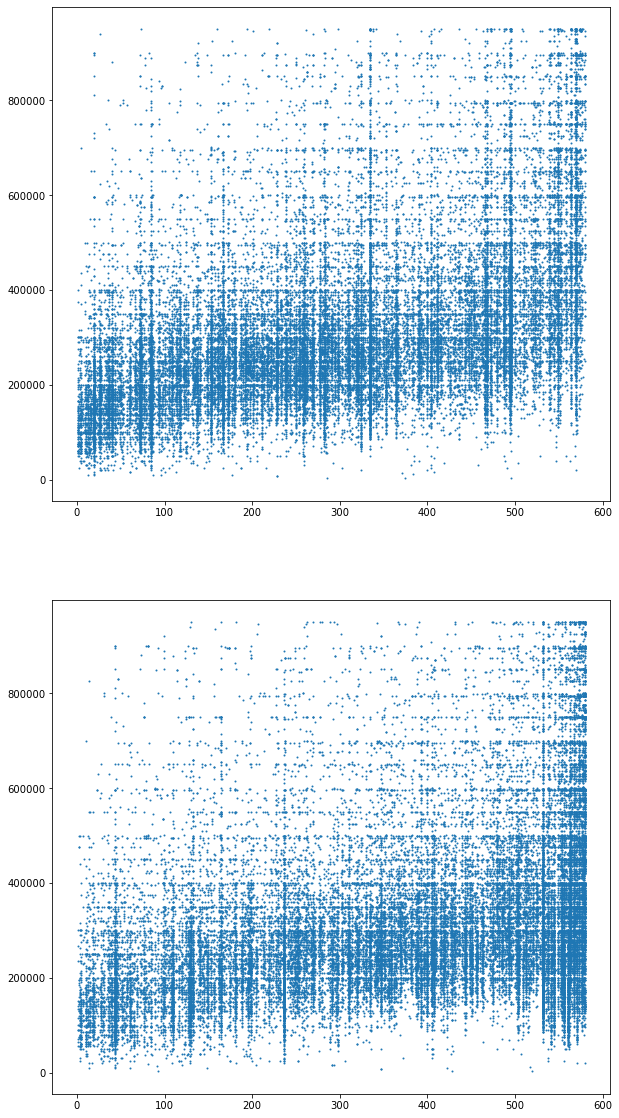

In [34]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,20))
ax1.scatter(immo_data['rank_city_pr'], immo_data['price'], s=1)
ax2.scatter(immo_data['rank_city_prsqm'], immo_data['price'], s=1)


--> Meilleur modèle : rank by mean price/commune, cubic

In [35]:
degree = 3

In [36]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [37]:
X_pr= immo_data['rank_city_pr'].to_numpy().reshape(len(immo_data),1)

In [38]:
X_prsqm= immo_data['rank_city_prsqm'].to_numpy().reshape(len(immo_data),1)

In [39]:
Y= immo_data['price'].to_numpy().reshape(len(immo_data),1)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pr,Y, test_size =0.2, random_state=20)

In [41]:
poly_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [42]:
poly_model.score(X_test, y_test)

0.249624234789682

In [43]:
predict_p1= poly_model.predict(X_train)

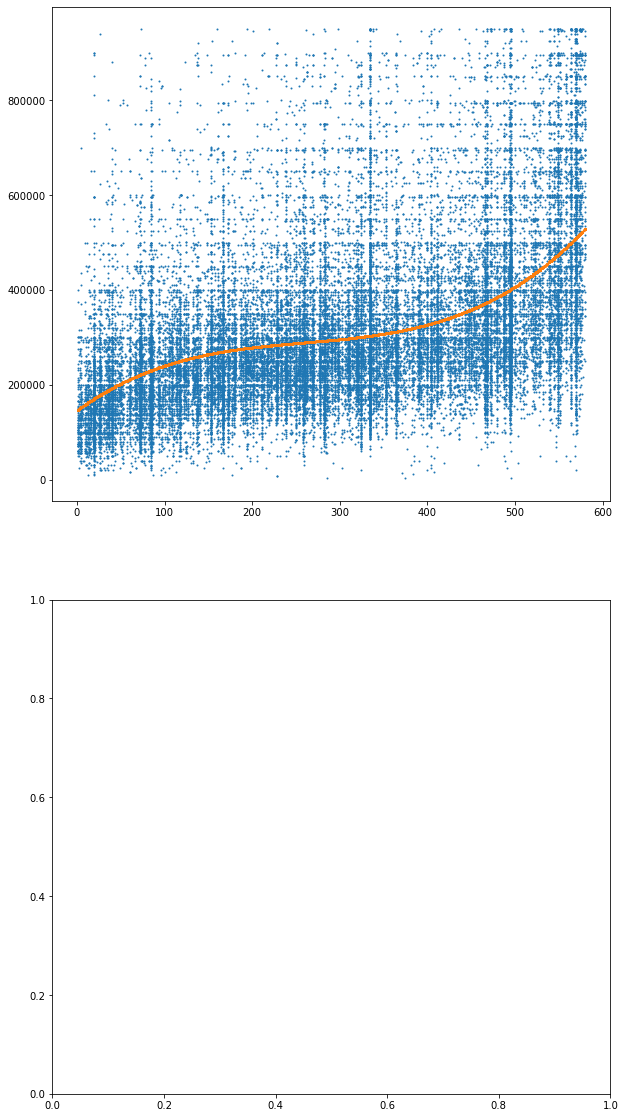

In [44]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,20))
ax1.scatter(immo_data['rank_city_pr'], immo_data['price'], s=1)
ax1.scatter(X_train,predict_p1, s=1)


In [45]:
immo_data.head(3)

,locality,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,...,number_of_facades,swimming_pool,state_of_the_building,construction_year,province,région,Commune,rank_city_pr,price_sqm,rank_city_prsqm
0,1050,house,house,340000,6,203.0,1,0,1,NaN,...,2.0,0,to be done up,1901.0,Bruxelles-Capitale,Région Bruxelles-capitale,IXELLES,564.0,1674.876847,578.0
1,1880,house,villa,525000,6,250.0,1,0,1,40.0,...,4.0,0,as new,1992.0,Brabant flamand,Région flamande,KAPELLE-OP-DEN-BOS,497.0,2100.000000,438.0
2,4900,house,exceptional property,550000,11,475.0,1,0,1,NaN,...,4.0,0,good,1853.0,Liège,Région wallonne,SPA,522.0,1157.894737,412.0


## Creation dummy coding pour state of the building 

In [49]:
immo_data.groupby(['state_of_the_building']).count()

,locality,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,...,surface_of_the_land,number_of_facades,swimming_pool,construction_year,province,région,Commune,rank_city_pr,price_sqm,rank_city_prsqm
state_of_the_building,,,,,,,,,,,,,,,,,,,,,
as new,12489,12489,12489,12489,12489,12467,12489,12489,12489,6005,...,4638,7758,12489,8622,12489,12489,12489,12489,12467,12489
good,11601,11601,11601,11601,11601,11562,11601,11601,11601,3989,...,6562,9690,11601,7143,11601,11601,11601,11601,11562,11601
just renovated,2271,2271,2271,2271,2271,2269,2271,2271,2271,856,...,1261,1881,2271,1191,2271,2271,2271,2271,2269,2271
to be done up,2987,2987,2987,2987,2987,2976,2987,2987,2987,839,...,2244,2437,2987,1674,2987,2987,2987,2987,2976,2987
to renovate,2591,2591,2591,2591,2591,2572,2591,2591,2591,504,...,2208,2209,2591,1266,2591,2591,2591,2591,2572,2591
to restore,157,157,157,157,157,155,157,157,157,23,...,138,142,157,45,157,157,157,157,155,157


In [53]:
immo_data.state_of_the_building.isna().sum()

10256

In [56]:
# immo_data = pd.get_dummies(immo_data, prefix='SB',columns = ['state_of_the_building'], drop_first=False)

In [57]:
immo_data.head(3)

,locality,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,...,Commune,rank_city_pr,price_sqm,rank_city_prsqm,SB_as new,SB_good,SB_just renovated,SB_to be done up,SB_to renovate,SB_to restore
0,1050,house,house,340000,6,203.0,1,0,1,NaN,...,IXELLES,564.0,1674.876847,578.0,0,0,0,1,0,0
1,1880,house,villa,525000,6,250.0,1,0,1,40.0,...,KAPELLE-OP-DEN-BOS,497.0,2100.000000,438.0,1,0,0,0,0,0
2,4900,house,exceptional property,550000,11,475.0,1,0,1,NaN,...,SPA,522.0,1157.894737,412.0,0,1,0,0,0,0


In [58]:
immo_data.columns

Index(['locality', 'type_of_property', 'subtype_of_property', 'price',
       'number_of_rooms', 'house_area', 'fully_equipped_kitchen', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area',
       'surface_of_the_land', 'number_of_facades', 'swimming_pool',
       'construction_year', 'province', 'région', 'Commune', 'rank_city_pr',
       'price_sqm', 'rank_city_prsqm', 'SB_as new', 'SB_good',
       'SB_just renovated', 'SB_to be done up', 'SB_to renovate',
       'SB_to restore'],
      dtype='object')

In [59]:
immo_data[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore', 'price']].corr()

,SB_as new,SB_good,SB_just renovated,SB_to be done up,SB_to renovate,SB_to restore,price
SB_as new,1.000000,-0.397205,-0.153935,-0.178139,-0.165083,-0.039447,0.146852
SB_good,-0.397205,1.000000,-0.146203,-0.169192,-0.156792,-0.037466,-0.039223
SB_just renovated,-0.153935,-0.146203,1.000000,-0.065569,-0.060764,-0.014520,0.015919
SB_to be done up,-0.178139,-0.169192,-0.065569,1.000000,-0.070318,-0.016803,-0.081931
SB_to renovate,-0.165083,-0.156792,-0.060764,-0.070318,1.000000,-0.015571,-0.102119
SB_to restore,-0.039447,-0.037466,-0.014520,-0.016803,-0.015571,1.000000,-0.030356
price,0.146852,-0.039223,0.015919,-0.081931,-0.102119,-0.030356,1.000000


In [62]:
apart= immo_data[immo_data['type_of_property']=='apartment']
house= immo_data[immo_data['type_of_property']=='house']

In [63]:
apart[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore', 'price']].corr()

,SB_as new,SB_good,SB_just renovated,SB_to be done up,SB_to renovate,SB_to restore,price
SB_as new,1.000000,-0.468001,-0.186184,-0.158205,-0.109263,-0.022899,0.164679
SB_good,-0.468001,1.000000,-0.134038,-0.113896,-0.078661,-0.016485,-0.130677
SB_just renovated,-0.186184,-0.134038,1.000000,-0.045311,-0.031293,-0.006558,0.016601
SB_to be done up,-0.158205,-0.113896,-0.045311,1.000000,-0.026591,-0.005573,-0.081224
SB_to renovate,-0.109263,-0.078661,-0.031293,-0.026591,1.000000,-0.003849,-0.054378
SB_to restore,-0.022899,-0.016485,-0.006558,-0.005573,-0.003849,1.000000,-0.006470
price,0.164679,-0.130677,0.016601,-0.081224,-0.054378,-0.006470,1.000000


In [67]:
apart[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore']].sum()

SB_as new            7821
SB_good              5003
SB_just renovated    1005
SB_to be done up      736
SB_to renovate        358
SB_to restore          16
dtype: int64

In [75]:
# apart[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore']].isna().sum()

In [64]:
house[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore', 'price']].corr()

,SB_as new,SB_good,SB_just renovated,SB_to be done up,SB_to renovate,SB_to restore,price
SB_as new,1.000000,-0.329568,-0.124930,-0.170589,-0.169830,-0.040630,0.201005
SB_good,-0.329568,1.000000,-0.157283,-0.214766,-0.213811,-0.051152,0.012287
SB_just renovated,-0.124930,-0.157283,1.000000,-0.081412,-0.081050,-0.019390,0.012802
SB_to be done up,-0.170589,-0.214766,-0.081412,1.000000,-0.110671,-0.026477,-0.110835
SB_to renovate,-0.169830,-0.213811,-0.081050,-0.110671,1.000000,-0.026359,-0.158871
SB_to restore,-0.040630,-0.051152,-0.019390,-0.026477,-0.026359,1.000000,-0.047689
price,0.201005,0.012287,0.012802,-0.110835,-0.158871,-0.047689,1.000000


In [68]:
house[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore']].sum()

SB_as new            4668
SB_good              6598
SB_just renovated    1266
SB_to be done up     2251
SB_to renovate       2233
SB_to restore         141
dtype: int64

In [76]:
# house[['SB_as new', 'SB_good', 'SB_just renovated', 'SB_to be done up', 'SB_to renovate', 'SB_to restore']].isna().sum()

## KO Exporation année de construction 

In [78]:
immo_data.columns

Index(['locality', 'type_of_property', 'subtype_of_property', 'price',
       'number_of_rooms', 'house_area', 'fully_equipped_kitchen', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area',
       'surface_of_the_land', 'number_of_facades', 'swimming_pool',
       'construction_year', 'province', 'région', 'Commune', 'rank_city_pr',
       'price_sqm', 'rank_city_prsqm', 'SB_as new', 'SB_good',
       'SB_just renovated', 'SB_to be done up', 'SB_to renovate',
       'SB_to restore'],
      dtype='object')

In [79]:
immo_data.construction_year.isnull().sum()

16216

In [80]:
len(immo_data)

42352

In [153]:
yearVsprice= immo_data[['construction_year','price']]
AyearVsprice= apart[['construction_year','price']]
HyearVsprice= house[['construction_year','price']]



In [87]:
yearVsprice.corr()

,construction_year,price
construction_year,1.000000,-0.034305
price,-0.034305,1.000000


In [154]:
AyearVsprice.corr()

,construction_year,price
construction_year,1.000000,0.031949
price,0.031949,1.000000


In [155]:
HyearVsprice.corr()

,construction_year,price
construction_year,1.000000,0.067005
price,0.067005,1.000000


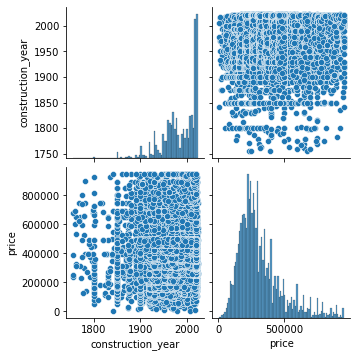

In [85]:
import seaborn as sns 
sns.pairplot(yearVsprice)

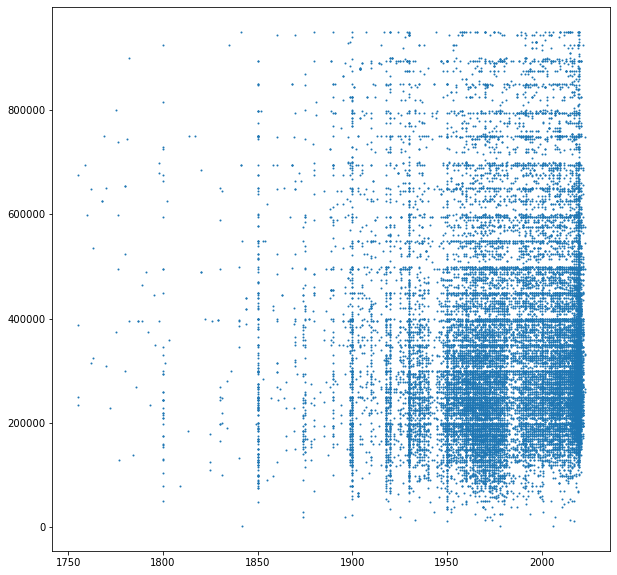

In [160]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, figsize=(10,10))
ax1.scatter(immo_data['construction_year'], immo_data['price'], s=1)


In [147]:
degree = 3

In [148]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [149]:
X_yc= immo_data['construction_year'].to_numpy().reshape(len(immo_data),1)
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
X_yc_imputed = imputer.fit_transform(X_yc)

In [150]:
Y= immo_data['price'].to_numpy().reshape(len(immo_data),1)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_yc_imputed,Y, test_size =0.2, random_state=20)

In [145]:
poly_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

In [146]:
poly_model.score(X_test, y_test)

0.012079992140684559

## Number of room 

suppresion outliers : nombre de chambre > 16

In [157]:
immo_data[['number_of_rooms', 'price']].corr()

,number_of_rooms,price
number_of_rooms,1.000000,0.259208
price,0.259208,1.000000


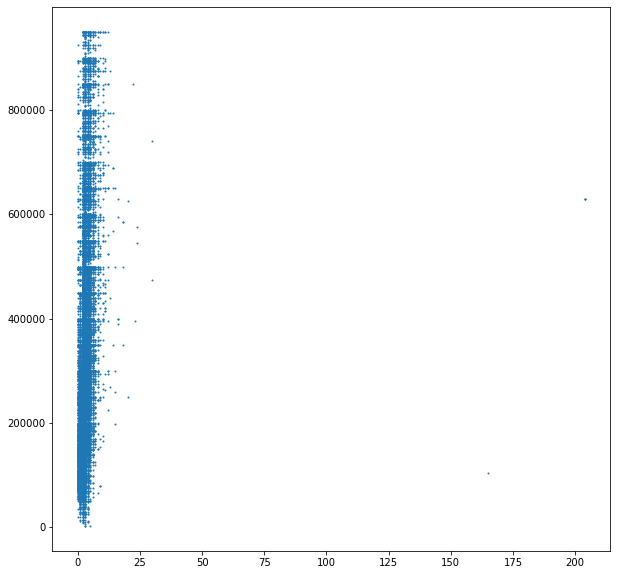

In [161]:
fig, ax1 = plt.subplots(1, figsize=(10,10))
ax1.scatter(immo_data['number_of_rooms'], immo_data['price'], s=1)

In [162]:
immo_data.number_of_rooms.value_counts()

2      14063
3      13564
4       5936
1       4313
5       2149
6        886
0        817
7        279
8        141
9         63
10        56
11        28
12        21
14         6
15         5
16         5
13         4
18         4
204        3
24         2
20         2
30         2
165        1
22         1
23         1
Name: number_of_rooms, dtype: int64

In [186]:
# immo_data[immo_data['number_of_rooms']>16]

In [187]:
immo_data = immo_data[immo_data['number_of_rooms']<17]

In [188]:
immo_data[['number_of_rooms', 'price']].corr()

,number_of_rooms,price
number_of_rooms,1.000000,0.423308
price,0.423308,1.000000


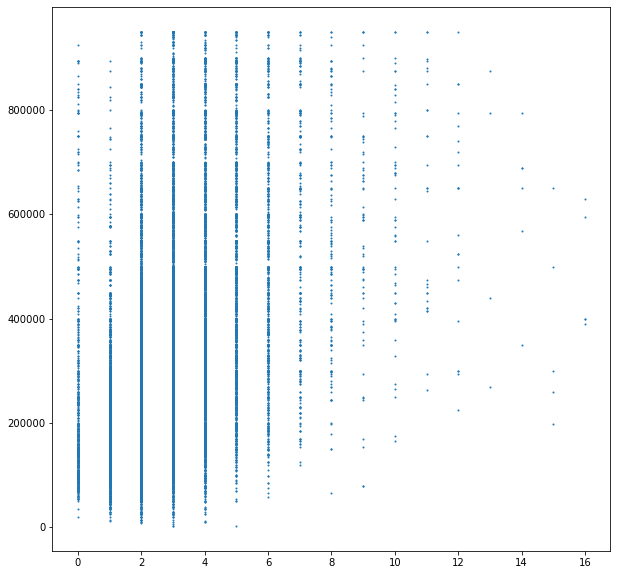

In [189]:
fig, ax1 = plt.subplots(1, figsize=(10,10))
ax1.scatter(immo_data['number_of_rooms'], immo_data['price'], s=1)

## Maintien de variable subtype_of_property

In [14]:
immo_data.groupby(['type_of_property', 'subtype_of_property']).subtype_of_property.count()

type_of_property  subtype_of_property 
apartment         apartment               15329
                  duplex                   1278
                  flat studio               724
                  ground floor             1098
                  kot                        67
                  loft                      199
                  penthouse                 830
                  service flat              255
                  triplex                    72
house             apartment block           794
                  bungalow                  226
                  castle                      7
                  chalet                    112
                  country cottage           236
                  exceptional property      381
                  farmhouse                  98
                  house                   16651
                  manor house                68
                  mansion                   394
                  mixed use building        741
 

# Saving subset as csv

In [191]:
immo_data.shape

(42336, 28)

In [192]:
immo_data.columns

Index(['locality', 'type_of_property', 'subtype_of_property', 'price',
       'number_of_rooms', 'house_area', 'fully_equipped_kitchen', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area',
       'surface_of_the_land', 'number_of_facades', 'swimming_pool',
       'construction_year', 'province', 'région', 'Commune', 'rank_city_pr',
       'price_sqm', 'rank_city_prsqm', 'SB_as new', 'SB_good',
       'SB_just renovated', 'SB_to be done up', 'SB_to renovate',
       'SB_to restore'],
      dtype='object')

Appart(['price','house_area',
       'number_of_rooms', 'fully_equipped_kitchen', 'open_fire',
       'terrace', 'terrace_area','Commune', 'rank_city_pr',
       'SB_as new', 'SB_good',
       'SB_just renovated', 'SB_to be done up', 'SB_to renovate',
       'SB_to restore'],
      dtype='object')

In [194]:
apart= immo_data[immo_data['type_of_property']=='apartment']
house= immo_data[immo_data['type_of_property']=='house']

In [199]:
apart_to_keep  = apart[['price','Commune', 'rank_city_pr','house_area', 'number_of_rooms', 'terrace', 'terrace_area', 'fully_equipped_kitchen', 'open_fire', 
       'SB_as new', 'SB_just renovated', 'SB_good',  'SB_to be done up', 'SB_to renovate', 'SB_to restore']]

In [210]:
apart_to_keep.reset_index(drop=True, inplace=True)

In [211]:
apart_to_keep

,price,Commune,rank_city_pr,house_area,number_of_rooms,terrace,terrace_area,fully_equipped_kitchen,open_fire,SB_as new,SB_just renovated,SB_good,SB_to be done up,SB_to renovate,SB_to restore
0,45000,LIÈGE,84.0,47.0,1,1,2.0,0,0,0,0,1,0,0,0
1,25000,LIÈGE,84.0,125.0,1,1,8.0,1,1,1,0,0,0,0,0
2,25000,LIÈGE,84.0,142.0,3,1,4.0,1,0,1,0,0,0,0,0
3,20000,COURCELLES,41.0,115.0,1,0,NaN,1,0,0,0,1,0,0,0
4,50000,SCHAERBEEK,404.0,96.0,2,0,NaN,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844,950000,KNOKKE-HEIST,570.0,157.0,2,0,NaN,1,0,0,0,1,0,0,0
19845,945000,TONGEREN,201.0,164.0,3,0,NaN,1,0,1,0,0,0,0,0
19846,950000,DURBUY,194.0,111.0,2,1,115.0,0,0,0,0,0,0,0,0
19847,950000,BRUGGE,468.0,182.0,2,0,NaN,1,0,0,1,0,0,0,0


House(['price','Commune', 'rank_city_pr','house_area', 'surface_of_the_land', 'number_of_facades',
       'number_of_rooms', 'garden','terrace', 'terrace_area', 'fully_equipped_kitchen', 'open_fire',
       'swimming_pool', 'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up', 'SB_to renovate',
       'SB_to restore'],
      dtype='object')

In [208]:
house_to_keep  = house[['price','Commune', 'rank_city_pr','house_area', 'surface_of_the_land', 'number_of_facades', 'number_of_rooms', 'garden','terrace', 'terrace_area', 'fully_equipped_kitchen', 'open_fire', 'swimming_pool', 'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up', 'SB_to renovate', 'SB_to restore']]

In [212]:
house_to_keep.reset_index(drop=True, inplace=True)

In [213]:
house_to_keep

,price,Commune,rank_city_pr,house_area,surface_of_the_land,number_of_facades,number_of_rooms,garden,terrace,terrace_area,fully_equipped_kitchen,open_fire,swimming_pool,SB_as new,SB_just renovated,SB_good,SB_to be done up,SB_to renovate,SB_to restore
0,340000,IXELLES,564.0,203.0,95.0,2.0,6,0,1,NaN,1,0,0,0,0,0,1,0,0
1,525000,KAPELLE-OP-DEN-BOS,497.0,250.0,826.0,4.0,6,1,1,40.0,1,0,0,1,0,0,0,0,0
2,550000,SPA,522.0,475.0,1543.0,4.0,11,1,1,NaN,1,0,0,0,0,1,0,0,0
3,550000,FRASNES-LEZ-ANVAING,340.0,325.0,3570.0,4.0,4,1,1,NaN,1,0,0,0,0,1,0,0,0
4,550000,CHARLEROI,19.0,400.0,616.0,3.0,5,1,1,80.0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,468000,RIJKEVORSEL,533.0,180.0,0.0,4.0,3,0,0,NaN,1,0,0,0,0,0,0,0,0
22483,454993,VILVOORDE,309.0,169.0,389.0,3.0,3,0,0,NaN,0,0,0,0,0,0,0,0,0
22484,475000,HOUTHALEN-HELCHTEREN,204.0,222.0,1124.0,4.0,3,0,0,NaN,0,0,0,0,0,0,0,0,0
22485,475000,ARLON,311.0,240.0,200.0,2.0,9,0,0,NaN,0,0,0,0,0,0,0,0,0


## Checking for Nan values 

houses

In [215]:
house_to_keep.isna().sum()

price                         0
Commune                       0
rank_city_pr                  0
house_area                  118
surface_of_the_land         135
number_of_facades          2871
number_of_rooms               0
garden                        0
terrace                       0
terrace_area              16214
fully_equipped_kitchen        0
open_fire                     0
swimming_pool                 0
SB_as new                     0
SB_just renovated             0
SB_good                       0
SB_to be done up              0
SB_to renovate                0
SB_to restore                 0
dtype: int64

In [221]:
house_to_keep.dtypes

price                       int64
Commune                    object
rank_city_pr              float64
house_area                float64
surface_of_the_land       float64
number_of_facades         float64
number_of_rooms             int64
garden                      int64
terrace                     int64
terrace_area              float64
fully_equipped_kitchen      int64
open_fire                   int64
swimming_pool               int64
SB_as new                   uint8
SB_just renovated           uint8
SB_good                     uint8
SB_to be done up            uint8
SB_to renovate              uint8
SB_to restore               uint8
dtype: object

In [216]:
house_to_keep.terrace.value_counts()

1    12399
0    10088
Name: terrace, dtype: int64

In [217]:
house_to_keep.loc[(house_to_keep.terrace ==0), 'terrace_area']=0

C:\Users\jcmeu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [218]:
house_to_keep.terrace_area.isna().sum()

6126

apartment

In [227]:
apart_to_keep.isna().sum()

price                        0
Commune                      0
rank_city_pr                 0
house_area                   0
number_of_rooms              0
terrace                      0
terrace_area              3429
fully_equipped_kitchen       0
open_fire                    0
SB_as new                    0
SB_just renovated            0
SB_good                      0
SB_to be done up             0
SB_to renovate               0
SB_to restore                0
dtype: int64

In [228]:
apart_to_keep.terrace.value_counts()

1    13449
0     6400
Name: terrace, dtype: int64

In [229]:
apart_to_keep.loc[(apart_to_keep.terrace ==0), 'terrace_area']=0

C:\Users\jcmeu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [230]:
apart_to_keep.terrace_area.isna().sum()

3429

### Save house and apartment DB in seoarated csv

In [231]:
apart_to_keep.to_csv('DEF_apart.csv')
house_to_keep.to_csv('DEF_house.csv')

In [ ]:
#df = df.drop(labels='type_of_sale', axis=1)
#df = df.drop(labels='furnished', axis=1)
#df = df.drop(labels='surface_of_the_plot_of_land', axis=1)